In [3]:
url = github.com/Cbmunns/Traffic_Sign_Recognition/blob/master/sign_data.zip



NameError: ignored

Done to unzip large data set
Please rename the zipped data file to sign_data


In [ ]:
import zipfile

!unzip url

Validates the data

In [ ]:
import glob

File_paths = glob.glob('/content/sign_data')

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os, sys
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
data = []
labels = []
classes = 43
os.chdir("/content/sign_data")
cur_path = os.getcwd()
print(cur_path)

/content/sign_data


In [ ]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train', str(i))
    print(path)
    images = os.listdir(path)
    #print(images)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


/content/sign_data/train/0
/content/sign_data/train/1
/content/sign_data/train/2
/content/sign_data/train/3
/content/sign_data/train/4
/content/sign_data/train/5
/content/sign_data/train/6
/content/sign_data/train/7
/content/sign_data/train/8
/content/sign_data/train/9
/content/sign_data/train/10
/content/sign_data/train/11
/content/sign_data/train/12
/content/sign_data/train/13
/content/sign_data/train/14
/content/sign_data/train/15
/content/sign_data/train/16
/content/sign_data/train/17
/content/sign_data/train/18
/content/sign_data/train/19
/content/sign_data/train/20
/content/sign_data/train/21
/content/sign_data/train/22
/content/sign_data/train/23
/content/sign_data/train/24
/content/sign_data/train/25
/content/sign_data/train/26
/content/sign_data/train/27
/content/sign_data/train/28
/content/sign_data/train/29
/content/sign_data/train/30
/content/sign_data/train/31
/content/sign_data/train/32
/content/sign_data/train/33
/content/sign_data/train/34
/content/sign_data/train/35
/c

In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39209, 30, 30, 3) (39209,)


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUS Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Num GPUS Available:  1
Found GPU at: /device:GPU:0


In [ ]:
with tf.device('/gpu:0'): 
  #Building the model
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
  model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.25))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(43, activation='softmax'))

  #Compilation of the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  epochs = 15
  history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
  model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 9s 8ms/step - loss: 3.1492 - accuracy: 0.3110 - val_loss: 0.6643 - val_accuracy: 0.8284
Epoch 2/15
981/981 [==============================] - 8s 8ms/step - loss: 0.8354 - accuracy: 0.7596 - val_loss: 0.2969 - val_accuracy: 0.9195
Epoch 3/15
981/981 [==============================] - 8s 8ms/step - loss: 0.5219 - accuracy: 0.8498 - val_loss: 0.1595 - val_accuracy: 0.9519
Epoch 4/15
981/981 [==============================] - 8s 8ms/step - loss: 0.3868 - accuracy: 0.8895 - val_loss: 0.2033 - val_accuracy: 0.9440
Epoch 5/15
981/981 [==============================] - 8s 8ms/step - loss: 0.3276 - accuracy: 0.9087 - val_loss: 0.0928 - val_accuracy: 0.9728
Epoch 6/15
981/981 [==============================] - 8s 8ms/step - loss: 0.2619 - accuracy: 0.9251 - val_loss: 0.0835 - val_accuracy: 0.9754
Epoch 7/15
981/981 [==============================] - 8s 8ms/step - loss: 0.2494 - accuracy: 0.9319 - val_loss: 0.0700 - val_accuracy: 0.9809
Epoch 

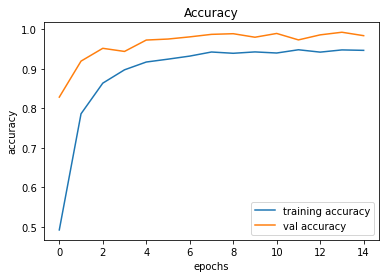

In [ ]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

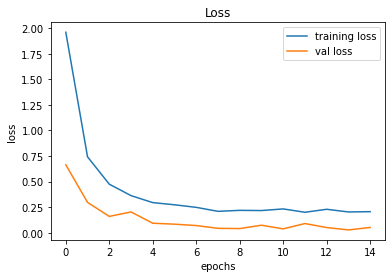

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

In [ ]:
y_test = pd.read_csv('Test.csv')
print(y_test)
labels = y_test["ClassId"].values
print(labels)
imgs = y_test["Path"].values
print(imgs)
data=[]
for img in imgs:
    image = Image.open(img)
    
    image = image.resize((30,30))
    
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)
print(pred)

       Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0         53      54       6       5      48      49       16  Test/00000.png
1         42      45       5       5      36      40        1  Test/00001.png
2         48      52       6       6      43      47       38  Test/00002.png
3         27      29       5       5      22      24       33  Test/00003.png
4         60      57       5       5      55      52       11  Test/00004.png
...      ...     ...     ...     ...     ...     ...      ...             ...
12625     42      41       5       6      37      36       12  Test/12625.png
12626     50      51       6       5      45      46       33  Test/12626.png
12627     29      29       6       6      24      24        6  Test/12627.png
12628     48      49       5       6      43      44        7  Test/12628.png
12629     32      31       6       5      27      26       10  Test/12629.png

[12630 rows x 8 columns]
[16  1 38 ...  6  7 10]
['Test/00000.p

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[16  1 38 ...  5  7 10]


In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


0.9511480601741884
